<a href="https://colab.research.google.com/github/pemiran1/Capstone-Three---Car-Price-Prediction/blob/main/Second_Hand_Car_Price_Prediction_Part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Second Hand Car Price Prediction **
In this project EDA and data wrangling is being conducted to predict prices of second hand vehicles for certain car models. Car prices in this dataset appear as Indian Rupees.

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving cars.csv to cars (3).csv


In [ ]:
# Libraries import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cars (3).csv']))
print(df)

    Car_ID     Brand          Model  Year  Kilometers_Driven Fuel_Type  \
0        1    Toyota        Corolla  2018              50000    Petrol   
1        2     Honda          Civic  2019              40000    Petrol   
2        3      Ford        Mustang  2017              20000    Petrol   
3        4    Maruti          Swift  2020              30000    Diesel   
4        5   Hyundai         Sonata  2016              60000    Diesel   
..     ...       ...            ...   ...                ...       ...   
95      96  Mercedes        C-Class  2019              22000    Diesel   
96      97    Toyota  Innova Crysta  2017              38000    Diesel   
97      98      Ford       EcoSport  2018              26000    Petrol   
98      99   Hyundai          Verna  2019              24000    Petrol   
99     100      Tata         Altroz  2020              18000    Petrol   

   Transmission Owner_Type  Mileage  Engine  Power  Seats    Price  
0        Manual      First       15    149

In [ ]:
#NumPy import
import numpy as np
import plotly.express as px

In [ ]:
df.isnull().sum()/df.count()*100

Car_ID               0.0
Brand                0.0
Model                0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [ ]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [ ]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

# Task 1 is to determine how many used cars are in this dataset per brand, also helping to visualize the car brand names included in this dataset.

In [ ]:
# Apply value_counts()
car_brand_count = df['Brand'].value_counts()
car_brand_count

Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

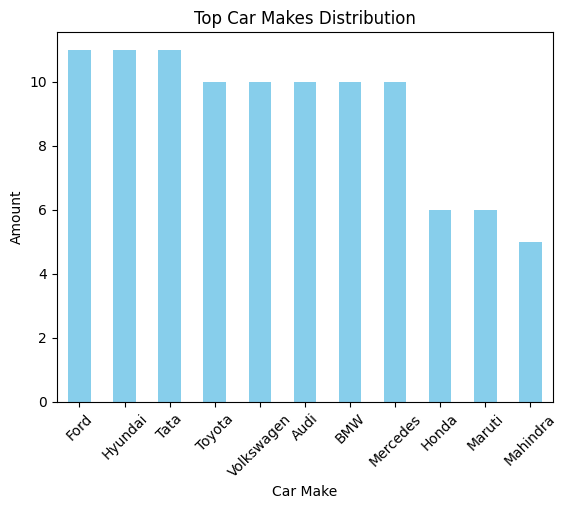

In [ ]:
#Car Brand Distribution
car_brands = df['Brand'].value_counts().head(11)
car_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Car Make')
plt.ylabel('Amount')
plt.title('Top Car Makes Distribution')
plt.xticks(rotation=45)
plt.show()

Task 2: Using value_counts, it is visible how many used cars in the dataset are included per year.

In [ ]:
#Apply value_counts()
used_car_year = df['Year'].value_counts()
used_car_year

Year
2018    28
2019    28
2017    21
2020    17
2016     4
2021     2
Name: count, dtype: int64

Task 3: Using value_counts once more, it is determined how many cars are within the same price point.

In [ ]:
#Apply value_counts()
used_car_price = df['Price'].value_counts()
used_car_price

Price
850000     8
600000     6
500000     6
650000     6
700000     6
750000     5
2700000    5
1600000    5
2500000    4
2800000    4
3200000    4
800000     3
1400000    3
550000     3
3000000    3
1800000    3
2000000    3
1200000    2
1300000    2
3500000    2
4000000    2
1500000    2
450000     2
2400000    2
2600000    2
2900000    2
1000000    1
1900000    1
2300000    1
2200000    1
900000     1
Name: count, dtype: int64

Visualization of Car Price Distribution

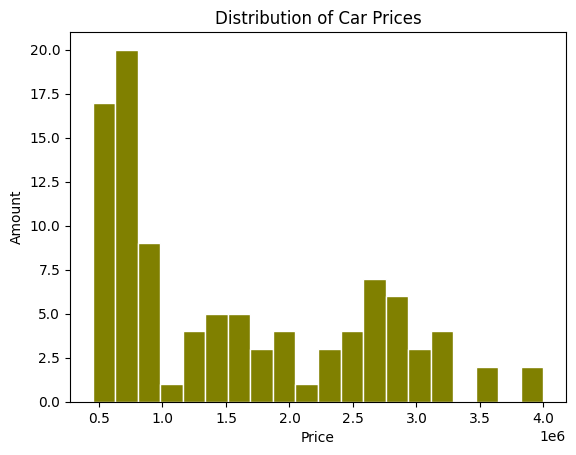

In [ ]:
# Histogram of car prices
plt.hist(df['Price'], bins=20, color='olive', edgecolor='white')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Distribution of Car Prices')
plt.show()

<ipython-input-65-325b903af965>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Owner_Type', data=df, palette='colorblind')


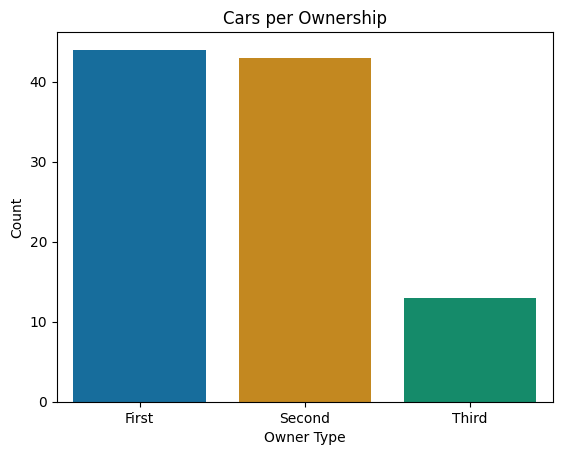

In [ ]:
#Amount of owners per car
sns.countplot(x='Owner_Type', data=df, palette='colorblind')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.title('Cars per Ownership')
plt.show()

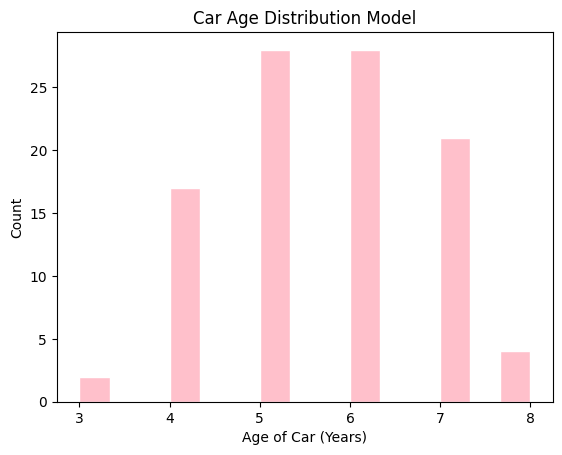

In [ ]:
# Histogram of car age in years
current_year_time = 2024
df['Car_Age'] = current_year_time - df['Year']
plt.hist(df['Car_Age'], bins=15, color='pink', edgecolor='white')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Count')
plt.title('Car Age Distribution Model')
plt.show()